In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv("ufc-master.csv")

In [81]:
#Prior to uploading the dataset, I converted the red and blue fighters to 1's and 0's
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,1,0,-150.0,130,66.666667,130.000000,10/2/2021,"Las Vegas, Nevada, USA",USA,Red,...,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,1,0,170.0,-200,170.000000,50.000000,10/2/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,1,0,110.0,-130,110.000000,76.923077,10/2/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,1,0,-675.0,475,14.814815,475.000000,10/2/2021,"Las Vegas, Nevada, USA",USA,Red,...,Punch,1.0,1:20,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,1,0,-135.0,115,74.074074,115.000000,10/2/2021,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,1,0,-155.0,135,64.516129,135.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Blue,...,NaN,1.0,0:44,44.0,NaN,NaN,NaN,NaN,NaN,NaN
4892,1,0,-210.0,175,47.619048,175.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punch,1.0,2:01,121.0,NaN,NaN,NaN,NaN,NaN,NaN
4893,1,0,-260.0,220,38.461538,220.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,Punches,1.0,0:47,47.0,NaN,NaN,NaN,NaN,NaN,NaN
4894,1,0,-420.0,335,23.809524,335.000000,3/21/2010,"Broomfield, Colorado, USA",USA,Red,...,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Setting our target variable
y = df.loc[:,"Winner"]

In [110]:
# I removed most columns I felt were unnecessary to the outcome. I felt variables that had more to do with the fight could help predict the outcome.

df.drop(columns=["date", "location","country", "gender", "title_bout", "finish_details",  "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", 
                 "B_Heavyweight_rank", "B_Light Heavyweight_rank", "B_Middleweight_rank", "B_Welterweight_rank", "B_Lightweight_rank", "B_Featherweight_rank", 
                 "B_Bantamweight_rank", "B_Flyweight_rank", "R_Women's Flyweight_rank", "R_Women's Featherweight_rank", "R_Women's Strawweight_rank", "R_Women's Bantamweight_rank", 
                 "R_Heavyweight_rank", "R_Light Heavyweight_rank", "R_Middleweight_rank", "R_Welterweight_rank", "R_Lightweight_rank", "R_Featherweight_rank", 
                 "R_Bantamweight_rank", "R_Flyweight_rank", "finish", "finish_details", "finish_round_time", "weight_class"], inplace=True)

In [118]:
# Looking for N/A values
df.isnull()

,Red,Blue,R_odds,B_odds,R_ev,B_ev,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,B_Pound-for-Pound_rank,better_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,True,True
4892,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,True,True
4893,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,True,True
4894,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,True,True,True,True


In [111]:
#Renaming the fighter columns to red and blue 
df.rename(columns={"R_fighter": "Red", "B_fighter":"Blue"}, inplace=True)

(array([2859.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2037.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

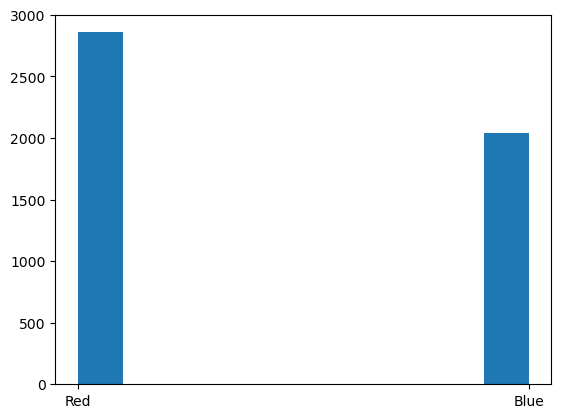

In [87]:
#Lets see which corner wins the most
plt.hist(df["Winner"].tolist())

In [127]:
#Create instance of label encoder
lab = LabelEncoder()

#Perform label encoding on columns to add to our model
df['Winner'] = lab.fit_transform(df['Winner'])
df['B_Stance'] = lab.fit_transform(df['B_Stance'])
df['R_Stance'] = lab.fit_transform(df['R_Stance'])
df['better_rank'] = lab.fit_transform(df['better_rank'])
y = lab.fit_transform(y)

In [115]:
# Fill the missing values
df.fillna("0")

,Red,Blue,R_odds,B_odds,R_ev,B_ev,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,...,B_Pound-for-Pound_rank,better_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,1,0,-150.0,130,66.666667,130.000000,1,5,0,1,...,0,1,5.0,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,1,0,170.0,-200,170.0,50.000000,0,3,2,0,...,0,2,3.0,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,1,0,110.0,-130,110.0,76.923077,0,3,1,0,...,0,2,3.0,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,1,0,-675.0,475,14.814815,475.000000,1,3,1,0,...,0,2,1.0,80.0,175.0,900.0,500.0,3500.0,110.0,1100.0
4,1,0,-135.0,115,74.074074,115.000000,0,3,0,2,...,0,2,3.0,900.0,165.0,200.0,400.0,1200.0,900.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,1,0,-155.0,135,64.516129,135.000000,0,3,0,0,...,0,2,1.0,44.0,0,0,0,0,0,0
4892,1,0,-210.0,175,47.619048,175.000000,1,3,0,0,...,0,2,1.0,121.0,0,0,0,0,0,0
4893,1,0,-260.0,220,38.461538,220.000000,1,3,1,0,...,0,2,1.0,47.0,0,0,0,0,0,0
4894,1,0,-420.0,335,23.809524,335.000000,1,3,0,0,...,0,2,3.0,900.0,0,0,0,0,0,0


In [116]:
# Find correlations with the target and sort
correlations = df.corr()['Winner'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(10))

Most Positive Correlations:
 B_age         0.102187
b_sub_odds    0.153265
b_ko_odds     0.205757
b_dec_odds    0.221583
B_ev          0.308188
B_odds        0.335417
Winner        1.000000
Red                NaN
Blue               NaN
constant_1         NaN
Name: Winner, dtype: float64


In [131]:
# Creating our train and test sets. Doing a 70/30 s
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

In [132]:
clf = HistGradientBoostingRegressor(max_iter=100).fit(X_train, y_train)

In [133]:
clf.score(X_test, y_test)

0.9999999992899575